In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df1=pd.read_csv('Housing.csv')
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [16]:
df1.shape

(545, 13)

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [18]:
df1.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


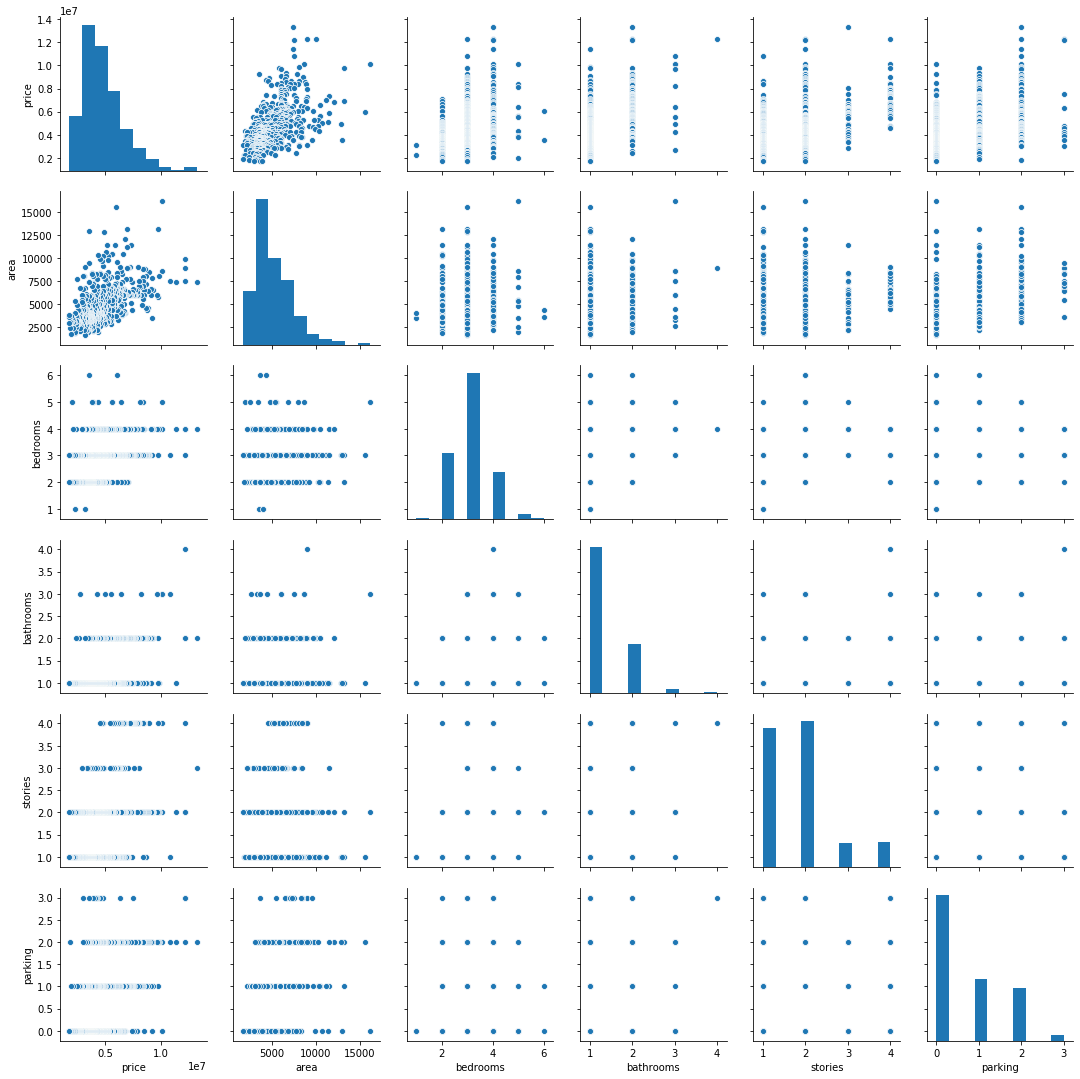

In [19]:
sns.pairplot(df1)

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
data=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for i in data:
    df1[i]=le.fit_transform(df1[i])
df1
    

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


In [23]:
status=pd.get_dummies(df1['furnishingstatus'])

In [24]:
status

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
5,0,1,0
6,0,1,0
7,0,0,1
8,1,0,0
9,0,0,1


In [25]:
status=pd.get_dummies(df1['furnishingstatus'],drop_first=True)

In [26]:
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
5,1,0
6,1,0
7,0,1
8,0,0
9,0,1


In [27]:
df1=pd.concat([df1,status],axis=1)

In [28]:
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished,1,0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished,1,0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished,0,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished,0,1


In [29]:
df1.drop('furnishingstatus',inplace=True,axis=1)

In [30]:
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1,0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1,0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0,1


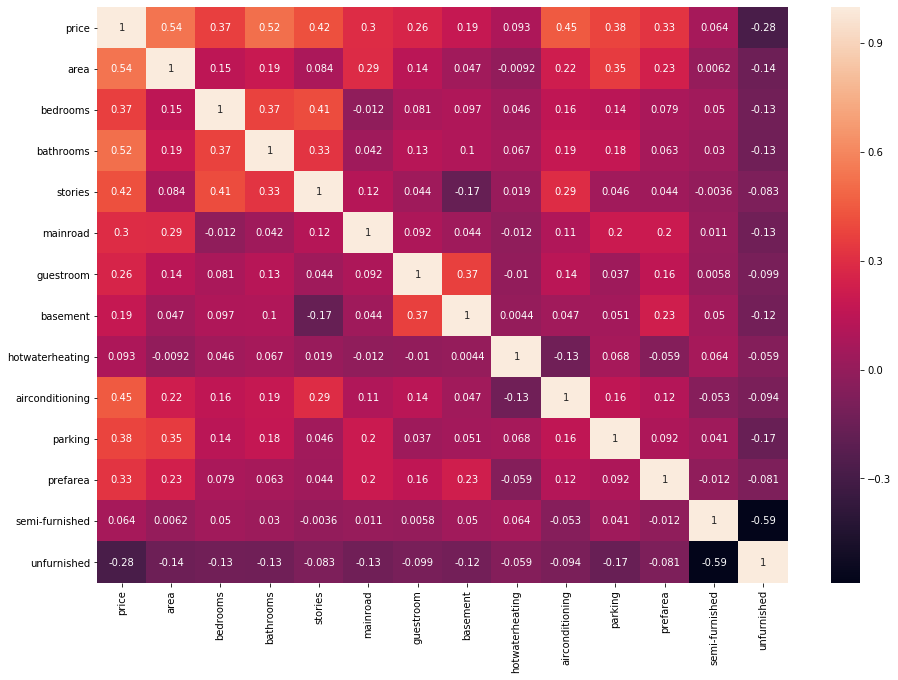

In [31]:
fig=plt.figure()
ax=fig.add_axes([1,1,2,2])
sns.heatmap(df1.corr(),annot=True)

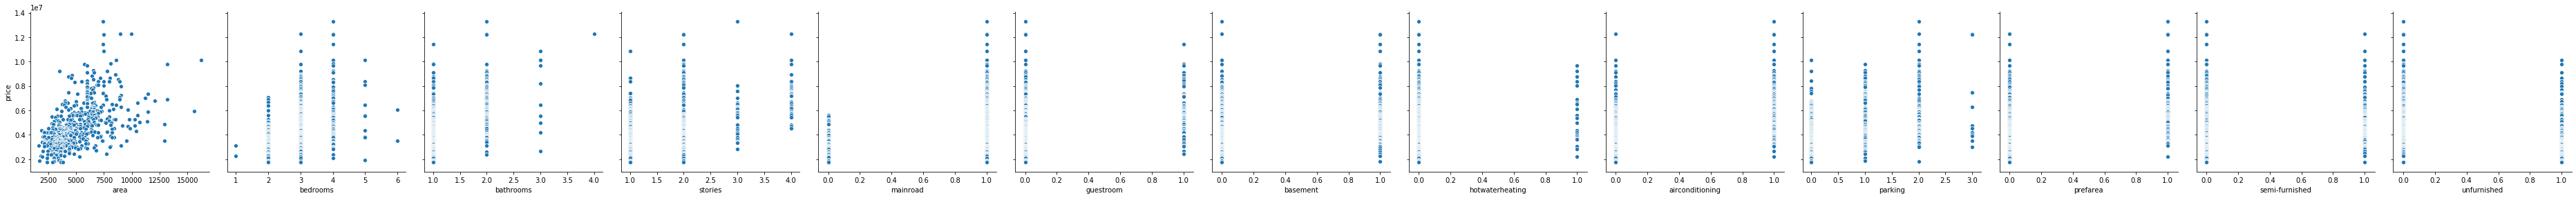

In [32]:
 
sns.pairplot(df1,x_vars=['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','semi-furnished','unfurnished'],y_vars='price',size=4,aspect=1,kind='scatter')
plt.show()

In [33]:
x=df1.drop('price',axis=1)
y=df1['price']

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [35]:
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()

In [36]:
#x_train=pd.DataFrame(scaler.fit_transform(x_train),columns=x.columns)
#x_train

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
lm=LinearRegression()
lm.fit(x_train,y_train)

rfe=RFE(lm,10)
rfe=rfe.fit(x_train,y_train)

In [39]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('area', False, 4),
 ('bedrooms', False, 2),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', True, 1),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 3),
 ('unfurnished', True, 1)]

In [40]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()

In [41]:
# x_train=pd.DataFrame(scaler.fit_transform(x_train),columns=x.columns)
# x_train

In [42]:
x=x_train.drop(['guestroom','semi-furnished','mainroad','bedrooms'],axis=1)

In [43]:
import statsmodels.api as sm
y_train=list(y_train)
x_train_sm=sm.add_constant(x)
lr=sm.OLS(y_train,x_train_sm).fit()


In [44]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     94.86
Date:                Mon, 09 Sep 2019   Prob (F-statistic):           1.36e-90
Time:                        17:23:21   Log-Likelihood:                -5820.0
No. Observations:                 381   AIC:                         1.166e+04
Df Residuals:                     371   BIC:                         1.170e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.874e+05    2.1e+05     

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #check for the VIF values of the feauture variables

In [46]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,bathrooms,7.88
0,area,6.10
2,stories,5.68
6,parking,1.90
5,airconditioning,1.74
3,basement,1.68
7,prefarea,1.44
8,unfurnished,1.40
4,hotwaterheating,1.12


In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [48]:
x_train=pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,0.296552,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.333333,0.0,0.0,0.0
1,0.089655,0.6,0.000000,0.666667,1.0,0.0,1.0,0.0,1.0,0.666667,0.0,1.0,0.0
2,0.133103,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,1.0
3,0.104138,0.4,0.000000,0.333333,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,1.0
4,0.213793,0.8,0.333333,0.666667,0.0,0.0,1.0,1.0,0.0,0.000000,0.0,0.0,1.0
5,0.109655,0.2,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.333333,0.0,0.0,0.0
6,0.135172,0.6,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
7,0.166897,0.2,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
8,0.089655,0.2,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0
9,0.237931,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,1.0,0.0


In [49]:
x_test=x_test.drop(['guestroom','semi-furnished','mainroad','bedrooms'],axis=1)

In [50]:

scaler=MinMaxScaler()

In [53]:
x_test=pd.DataFrame(scaler.transform (x_test),columns=x_test.columns)
x_test

,area,bathrooms,stories,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
0,-0.158002,-0.50,-0.333333,0.0,0.0,1.0,0.333333,0.0,0.0
1,-0.158019,-0.25,-0.222222,0.0,0.0,1.0,0.222222,0.0,0.0
2,-0.158022,-0.25,-0.222222,1.0,0.0,0.0,0.111111,0.0,1.0
3,-0.157985,-0.50,-0.333333,0.0,0.0,0.0,0.222222,0.0,0.0
4,-0.158030,-0.50,-0.222222,0.0,1.0,0.0,0.111111,0.0,0.0
5,-0.158011,-0.50,-0.333333,0.0,0.0,0.0,0.000000,0.0,0.0
6,-0.158006,-0.25,0.000000,0.0,0.0,1.0,0.111111,0.0,0.0
7,-0.158032,-0.50,-0.222222,0.0,0.0,0.0,0.111111,0.0,1.0
8,-0.158028,-0.50,-0.333333,1.0,0.0,1.0,0.000000,1.0,0.0
9,-0.157967,-0.50,-0.333333,0.0,0.0,0.0,0.111111,1.0,0.0


In [54]:
lm=LinearRegression()
lm.fit(x_test,y_test)

rfe=RFE(lm,10)
rfe=rfe.fit(x_test,y_test)

In [55]:
list(zip(x_test.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('basement', True, 1),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('unfurnished', True, 1)]

In [56]:
y_test=list(y_test)
x_test_sm=sm.add_constant(x_test)
lr=sm.OLS(y_test,x_test_sm).fit()


In [57]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     28.68
Date:                Mon, 09 Sep 2019   Prob (F-statistic):           9.13e-29
Time:                        17:24:12   Log-Likelihood:                -2514.7
No. Observations:                 164   AIC:                             5049.
Df Residuals:                     154   BIC:                             5080.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.928e+09   8.17e+08     

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lm=LinearRegression()

In [65]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
y_pred = lm.predict(x_test)

ValueError: shapes (164,9) and (13,) not aligned: 9 (dim 1) != 13 (dim 0)

In [71]:
from sklearn import metrics


In [72]:
metrics.r2_score(y_test,y_pred)

NameError: name 'y_pred' is not defined